# Task

In the file 'crime_data.csv' data can be fond on a number of crimes per 100,000 inhabitants in each of the states of the United States of America alongwith the percentage of the population that lives in urban areas. Crimes are grouped as: assault, murder, y rape.

Segment this dataset using k-means and obtain the centroides for each cluster and list the states in ahc cluster. For this, it will be necessary to determine the optimum number of clusters to divide the dataset.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('crime_data.csv')

df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Check for missing values
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Inertia and Silhouette Plot

In [4]:
inertia_X = [] # Initiate empty list to store inertia values
silhouette_scores = [] # Initiate empty list to store silhouette scores

X = df.drop('State', axis=1) # Drop State column from dataset


for k in range(2, 20): # Perform KMeans algorithm with number of cluster centres in a range between 2 and 20
    kmeans = KMeans(n_clusters=k).fit(X) # Fit the KMeans algorithm
    inertia_X.append(kmeans.inertia_) # Append inertia score to list
    silhouette_scores.append(silhouette_score(X, kmeans.labels_)) # Append silhouette score to list


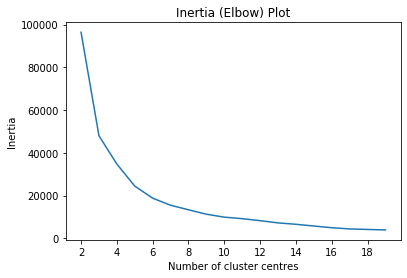

In [5]:
# Disply inertia plot

plt.plot(range(2, 20), inertia_X)
plt.xlabel('Number of cluster centres')
plt.ylabel('Inertia')
plt.title('Inertia (Elbow) Plot')
plt.xticks(np.arange(2, 20, 2))

plt.show()

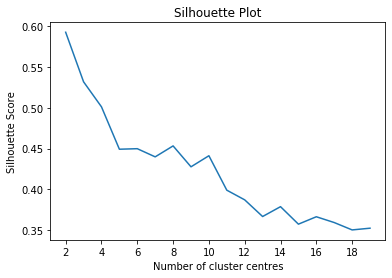

In [6]:
#Display silhouette plot

plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('Number of cluster centres')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.xticks(np.arange(2, 20, 2))

plt.show()

From both the Intertia plot and the Silhouette plot a case can be made for either 4, 5, or 6 cluster centres. Here we will elect for 5 cluster centres as the inertia for 4 centres is considerably higher than 5 centres, and that the silhouette score for 5 and 6 centres is practically the same.

In [7]:
kmeans = KMeans(n_clusters=5).fit(X) # Perform KMeans with 5 cluster centres

In [8]:
cluster_centres = kmeans.cluster_centers_ # Get coordinates of cluster centres
centres_df = pd.DataFrame(cluster_centres, columns=X.columns) # Save Cluster centre coordinates as a DataFrame
centres_df

,Murder,Assault,UrbanPop,Rape
0,2.950000,62.700000,53.900000,11.510000
1,12.380000,246.600000,67.200000,27.780000
2,7.507692,170.384615,71.461538,22.615385
3,5.590000,112.400000,65.600000,17.270000
4,11.800000,300.857143,68.714286,28.857143


In [9]:
clusters = kmeans.labels_ # Get cluster labels

df_with_clusters = df.copy() # Copy original dataset
df_with_clusters['Cluster'] = pd.Series(clusters, index=df_with_clusters.index) # Add cluster labels to dataset
df_with_clusters.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,4


#### Plot clustering results using 'Murder' and 'Assault' columns

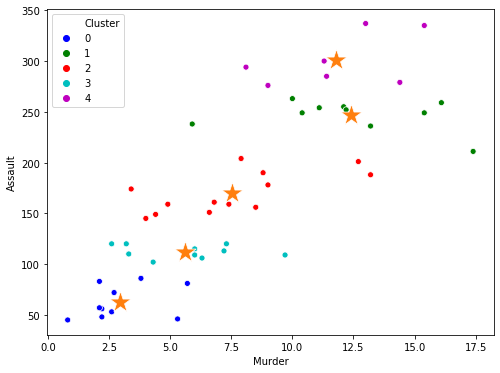

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Murder', y='Assault', data=df_with_clusters, hue='Cluster', palette=['b', 'g', 'r', 'c', 'm']) # Plot data
sns.scatterplot(x='Murder', y='Assault', data=centres_df, marker='*', s=500) # Plot cluster centres

plt.show()

#### Display states belonging to each cluster

In [11]:
cluster_0 = df_with_clusters[df_with_clusters['Cluster'] == 0]['State']
cluster_0

10           Hawaii
14             Iowa
18            Maine
22        Minnesota
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object

In [12]:
cluster_1 = df_with_clusters[df_with_clusters['Cluster'] == 1]['State']
cluster_1

0         Alabama
1          Alaska
7        Delaware
9         Georgia
12       Illinois
17      Louisiana
21       Michigan
23    Mississippi
27         Nevada
31       New York
Name: State, dtype: object

In [13]:
cluster_2 = df_with_clusters[df_with_clusters['Cluster'] == 2]['State']
cluster_2

3          Arkansas
5          Colorado
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
41        Tennessee
42            Texas
45         Virginia
46       Washington
49          Wyoming
Name: State, dtype: object

In [14]:
cluster_3 = df_with_clusters[df_with_clusters['Cluster'] == 3]['State']
cluster_3

6      Connecticut
11           Idaho
13         Indiana
15          Kansas
16        Kentucky
25         Montana
26        Nebraska
34            Ohio
37    Pennsylvania
43            Utah
Name: State, dtype: object

In [15]:
cluster_4 = df_with_clusters[df_with_clusters['Cluster'] == 4]['State']
cluster_4

2            Arizona
4         California
8            Florida
19          Maryland
30        New Mexico
32    North Carolina
39    South Carolina
Name: State, dtype: object